# Backpropagation Algorithm on Artificial Neural Networks

Name : Suraj Baradhi
Roll No : 177110
Section : A


In machine learning, backpropagation  is a widely used algorithm in training feedforward neural networks for supervised learning. Generalizations of backpropagation exists for other artificial neural networks (ANNs), and for functions generally. These classes of algorithms are all referred to generically as "backpropagation".In fitting a neural network, backpropagation computes the gradient of the loss function with respect to the weights of the network for a single input–output example, and does so efficiently, unlike a naive direct computation of the gradient with respect to each weight individually. This efficiency makes it feasible to use gradient methods for training multilayer networks, updating weights to minimize loss; gradient descent, or variants such as stochastic gradient descent, are commonly used.

In the notebook below I have implemented Backpropagation with a network similar to the one drawn below. It has an input layer , a hidden layer and an output layer.

<img src="Backprop.jpg" alt="alt text" width="500"/>

**Libraries to Import**

In [43]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from tqdm import tqdm

### Extracting Data from CSV File and Dividing Data set into Training Data and Test Data

The dataset I'm using is a Wheat Seeds data set.
It takes geometry aspects of different wheat seeds and classifies them.

The function **GetData()** performs the following operations :

1. Read data from respective CSV file into a Data Frame
2. Partitions the Data set into training data and Test Data
3. Converts the Data into a numpy array 

Parameters returned :
1. **X_train** : Feature vector for Training data. 
2. **X_test** : Feature vector for testing
3. **Y_train** : Target vector for Training data
4. **Y_test** : Target vector for Test Data

In [44]:
def GetData():
    dataframe = pd.read_csv('XOR.csv') 
    
#     for feature_name in dataframe.columns:
#         if feature_name != 'Result':
#             max_value = dataframe[feature_name].max()
#             min_value = dataframe[feature_name].min()
#             dataframe[feature_name] = (dataframe[feature_name] - min_value) / (max_value - min_value)
    print(dataframe.head())
    m = dataframe.shape[0]
    n = len(dataframe.columns) - 1

    # print relevant metadata

    print("For This Dataset:")
    print("m = ", m)
    print("n = ", n) 

    # get counts
    traincount = int(1*m)
    testCount = int(1*m)


    X_train = dataframe.iloc[:traincount, :n].to_numpy(dtype = np.float64)
    Y_train = dataframe.iloc[:traincount, n:].to_numpy(dtype = np.float64)
    #Y_train = pd.get_dummies(dataframe['Result']).iloc[:traincount, :].to_numpy(dtype = np.float64)
    
    
    X_test = dataframe.iloc[:, :n].to_numpy(dtype = np.float64)
    Y_test = dataframe.iloc[:, n:].to_numpy(dtype = np.float64)
    #Y_test = pd.get_dummies(dataframe['Result']).iloc[:, :].to_numpy(dtype = np.float64)


    print('X_train : ', X_train,'\n','Y_Train ', Y_train)
    print('Y test ' ,Y_test )
    
    return X_train , Y_train , m , n , X_test, Y_test 

### Initialization of Parameters

In this step weights and biases are initialized accordingly.

1. **ni** : The number of input layer neurons
2. **no** : The number of output layer neurons
3. **nh** : The number of hidden layer neurons
4. **i2hweights** : The vector of weights joining input layer neurons and hidden layer neurons.
5. **h2oweights** : The vector of weights joining hidden layer neurons and output layer neurons.
6. **hiddenbias** : The bias value associated with hidden layer neurons.
7. **outputbias** : The bias value associated with output layer neurons.

In [45]:
ni = 2
no = 1
nh = 2
i2hweights = np.ones((ni,nh),dtype=np.float64)*0.2
h2oweights = np.ones((nh,no),dtype=np.float64)*0.2
hiddenbias = np.ones((1,nh) , dtype = np.float64)*0.2
outputbias = np.ones((1,no) , dtype = np.float64)*0.2
error = []

### The sigmoid Function
The activation function I use in the Backpropagation algorithm is the sigmoid activation. It is differentiable.Mathematically defined as :
$$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [46]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

### Function to predict the target value for a given feature vector based on Weights vector

The function **Predict** takes in the following parameters :
1. **x** : The feature vector

The output of every hidden layer neuron and output layer neuron is calculated using the formula given below.
Here **W** is the weight vector and **X** is the feature vector.

**Y** = $\sigma(W^T.X)$

#### Return parameters :

1. Output of Hidden Neurons
2. Output of Output Layer Neurons

In [47]:
def Predict(X):
    HiddenOutput = sigmoid(np.dot(X,i2hweights) + hiddenbias)
    ActualOutput = sigmoid(np.dot(HiddenOutput, h2oweights) + outputbias )
    return HiddenOutput.reshape(1,nh) , ActualOutput.reshape(1,no)

### Training Function 

The function changes the weights of the weight vector based on the perceptron training algorithm.

This function takes in the following parameters :
1. **eta** : Learning Rate
2. **X_train** : Feature vector for training
3. **Y_train** : Target vector for training 

**The training algorithm used in Backpropagation network follows the below steps :**

**For each training example in (X,T) where T is the target vector :**

1. Input X to the network and calculate the value of $o_{u}$ each and every neuron in the network.

**Propagate the errors backward through the network.**

2. For each network output unit k, calculate its error term $\delta_{k}$
$$ \delta_{k} = o_{k} ( 1-o_{k}) (t_{k}-o_{k}) $$

3. For each hidden unit h, calculate its error term $\delta_{h}$
$$ \delta_{h} = o_{h} ( 1-o_{h}) \sum_{k:outputs} w_{kh}\delta_{k} $$

4. Update each network weight $w_{ji}$
$$w_{ji} = w_{ji} + \Delta w_{ji}$$
where 
$$ \Delta w_{ji} = \eta \delta_{j} x_{ji}$$

In [48]:
def Train(eta , X_Train , Y_Train):
    global h2oweights
    global i2hweights
    global outputbias
    global hiddenbias
    err = 0
    
    for example , Real  in zip(X_Train, Y_Train):
        
#         print('Training data element ', example)
#         print('Target data element ', Real)
        example = np.reshape(example , (1,ni))
        Real = np.reshape(Real, (1,no))
        
        HiddenOutput , ActualOutput = Predict(example)
        err += np.sum((ActualOutput-Real)*(ActualOutput-Real))
        
#         print('Hidden layer outputs ' , HiddenOutput)
#         print('Output layer outputs ' , ActualOutput)
        
        
        OutputErrorTerm = ActualOutput*(1-ActualOutput)*(Real - ActualOutput)
        HiddenErrorTerm = HiddenOutput*(1- HiddenOutput) * (np.dot(OutputErrorTerm ,np.transpose(h2oweights)))
        
#         print('OutputErrorTerm ', OutputErrorTerm)
#         print('HiddenErrorTerm ', HiddenErrorTerm)
        Deltah2o = eta * np.dot(np.transpose(HiddenOutput), OutputErrorTerm.reshape(1,no) )
        Deltai2h = eta * np.dot(np.transpose(example.reshape(1,ni)) , HiddenErrorTerm.reshape(1,nh) )
        
#         print('Delta of input to hidden weights ', Deltai2h)
#         print('Delta of hidden to output weights ', Deltah2o)
        
        DeltaHiddenBias = eta * HiddenErrorTerm
        DeltaOutputBias = eta * OutputErrorTerm
        
#         print('Delta of hidden bias ', DeltaHiddenBias )
#         print('Delta of output bias ', DeltaOutputBias )
        
        hiddenbias += DeltaHiddenBias
        outputbias += DeltaOutputBias
        i2hweights += Deltai2h
        h2oweights += Deltah2o
        error.append(err)
        
#         print('Updated input to hidden layer weights ', i2hweights)
#         print('Updated hidden to output layer weights ', h2oweights)
#         print('Updated output bias ', outputbias)
#         print('Updated hidden bias ', hiddenbias)
#         print('-----------------------End of Training EXample -----------------------')

### Testing Function

This function tests the accuracy of the weight vector based on the training data set.

Parameters Taken :
1. **X_Test** : Feature Vector for Testing
2. **Y_Test** : Target vector for Testing 

Return types :
1. **Accuracy** in percent

In [49]:
def Test( X_Test , Y_Test ):
    correct=0
    total=0
    print('Testing -------')
    for example , Real  in zip(X_Test, Y_Test):
        example = np.reshape(example,(1,ni))
        print('Example : ', example )
        Hidden , Actual = Predict(example)
        print('Guess ', Actual[0] , 'Actual value ', Real)
        print('Where L ', np.where(Actual[0]==np.max(Actual[0]))[0] , 'Where R ', np.where(Real==1)[0] )
        if np.where(Actual[0]==np.max(Actual[0]))[0] == np.where(Real==1)[0]:
            correct+=1
        total+=1
    
    return correct/total*100

### Main Function

This block first trains the weight vector based on the training data set and tests the validity of the updated weight vector. At the end , accuracy of the tests is performed.
Training is done over **numepochs** iterations.

100%|██████████| 7/7 [00:00<00:00, 675.50it/s]

   X1  X2  Z
0   0   0  1
1   0   1  0
2   1   0  0
3   1   1  1
For This Dataset:
m =  4
n =  2
X_train :  [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]] 
 Y_Train  [[1.]
 [0.]
 [0.]
 [1.]]
Y test  [[1.]
 [0.]
 [0.]
 [1.]]
----------Testing------------------------
Testing -------
Example :  [[0. 0.]]
Guess  [0.55865458] Actual value  [1.]
Where L  [0] Where R  [0]
Example :  [[0. 1.]]
Guess  [0.56181138] Actual value  [0.]
Where L  [0] Where R  []
Example :  [[1. 0.]]
Guess  [0.56182581] Actual value  [0.]
Where L  [0] Where R  []
Example :  [[1. 1.]]
Guess  [0.56486039] Actual value  [1.]
Where L  [0] Where R  [0]
Accuracy :  50.0
Final input to hidden layer weights  [[0.19708386 0.19708386]
 [0.19617216 0.19617216]]
Final hidden to output layer weights  [[0.1335444]
 [0.1335444]]
Final output bias  [[0.08922505]]
Final hidden bias  [[0.19431361 0.19431361]]
Testing -------
Example :  [[0. 0.]]
Guess  [0.55865458] Actual value  [1.]
Where L  [0] Where R  [0]
Example :  [[0. 1.]]
Guess  [0.5618


/home/suraj/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  # This is added back by InteractiveShellApp.init_path()


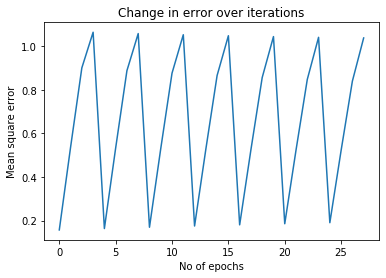

In [50]:
X_Train, Y_Train, m, n , X_Test, Y_Test = GetData() 
numepochs = 7
eta = 0.2
print('----------Testing------------------------')

for i in tqdm(range(0, numepochs)):
    Train(eta , X_Train , Y_Train )


print('Accuracy : ' , Test(X_Test, Y_Test))


print('Final input to hidden layer weights ', i2hweights)
print('Final hidden to output layer weights ', h2oweights)
print('Final output bias ', outputbias)
print('Final hidden bias ', hiddenbias)
plt.plot( range(0,len(error)) , error )
plt.xlabel('No of epochs')
plt.ylabel('Mean square error')
plt.title('Change in error over iterations')

print('Accuracy : ' , Test(X_Test, Y_Test))
